In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
%matplotlib inline

In [33]:
df = pd.read_csv('./data/Customer-Churn.csv')

In [34]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [35]:
df.shape

(7043, 21)

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [167]:
def data_prep(df):
    
    df1 = df.copy()
    
    df1.columns = df1.columns.str.lower().str.replace(' ', '_')

    categorical_columns = list(df1.dtypes[df1.dtypes == 'object'].index)

    for col in categorical_columns:
        df1[col] = df1[col].str.lower().str.replace(' ', '_')
        
    y = np.where(df1.churn == 'yes', 1, 0)
    
    df1['totalcharges'] = pd.to_numeric(df1.totalcharges, errors='coerce')
    df1['totalcharges'] = df1['totalcharges'].fillna(0)
    df1['gender'] = np.where(df1['gender'] == 'female', 1, 0)
    df1['partner'] = np.where(df1['partner'] == 'yes', 1, 0)
    df1['dependents'] = np.where(df1['dependents'] == 'yes', 1, 0)
    df1['phoneservice'] = np.where(df1['phoneservice'] == 'yes', 1, 0)
    df1['multiplelines'] = np.where(df1['multiplelines'] == 'yes', 1, 0)
    df1['internetservicefiber'] = np.where(df1['internetservice'] == 'fiber_optic', 1, 0)
    df1['internetservicedsl'] = np.where(df1['internetservice'] == 'dsl', 1, 0)
    df1['onlinesecurity'] = np.where(df1['onlinesecurity'] == 'yes', 1, 0)
    df1['onlinebackup'] = np.where(df1['onlinebackup'] == 'yes', 1, 0)
    df1['deviceprotection'] = np.where(df1['deviceprotection'] == 'yes', 1, 0)
    df1['techsupport'] = np.where(df1['techsupport'] == 'yes', 1, 0)
    df1['streamingtv'] = np.where(df1['streamingtv'] == 'yes', 1, 0)
    df1['streamingmovies'] = np.where(df1['streamingmovies'] == 'yes', 1, 0)
    df1['paperlessbilling'] = np.where(df1['paperlessbilling'] == 'yes', 1, 0)
    df1 = pd.get_dummies(columns=['contract', 'paymentmethod'], data=df1)

    # columns_to_drop = ['churn', 'customerid', 'internetservice', 'gender', 'phoneservice', 'multiplelines']
    # df1.drop(columns=columns_to_drop, inplace=True)
    
    return df1, y

In [168]:
df1, y = data_prep(df)

In [169]:
df1.dtypes

customerid               object
gender                    int64
seniorcitizen             int64
partner                   int64
dependents                int64
tenure                    int64
phoneservice              int64
multiplelines             int64
internetservice          object
onlinesecurity            int64
onlinebackup              int64
deviceprotection          int64
techsupport               int64
streamingtv               int64
streamingmovies           int64
contract                 object
paperlessbilling          int64
paymentmethod            object
monthlycharges          float64
totalcharges            float64
churn                    object
internetservicefiber      int64
internetservicedsl        int64
dtype: object

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## EDA

In [132]:
global_churn_rate = np.mean(y)
global_churn_rate

np.float64(0.2653698707936959)

In [133]:
numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']

In [134]:
categorical_columns = ['gender', 'seniorcitizen', 'partner', 'dependents', 
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'internetservicefiber', 'internetservicedsl']

<Axes: >

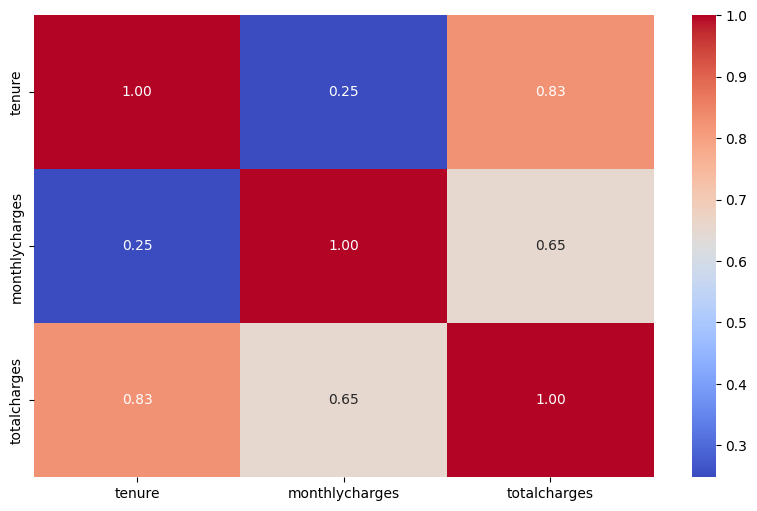

In [165]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1[numerical_columns].corr(method='pearson'), annot=True, fmt='.2f', cmap='coolwarm')

In [139]:
churn_rate_male = (df1[df1['gender'] == 0]['churn'] == 'yes').mean()
churn_rate_male

np.float64(0.2616033755274262)

In [140]:
churn_rate_female = (df1[df1['gender'] == 1]['churn'] == 'yes').mean()
churn_rate_female

np.float64(0.26920871559633025)

- The churn rate in females and males is same as global churn rate. This column has no significant information

In [141]:
churn_rate_with_partner = (df1[df1['partner'] == 1]['churn'] == 'yes').mean()
churn_rate_with_partner

np.float64(0.1966490299823633)

In [143]:
churn_rate_no_partner = (df1[df1['partner'] == 0]['churn'] == 'yes').mean()
churn_rate_no_partner

np.float64(0.32957978577313923)

- The churn rate of partner and no partner groups is very different

- Risk Ratio = churn_group / global_churn

In [149]:
df1['churn'] = np.where(df1['churn'] == 'yes', 1, 0)

In [154]:
from IPython.display import display

In [155]:
for col in categorical_columns:
    print(col)
    df_group = df1.groupby(col).churn.aggregate(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print('\n\n') 

gender


,mean,count,diff,risk
gender,,,,
0,0.261603,3555,-0.003766,0.985807
1,0.269209,3488,0.003839,1.014466





seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236062,5901,-0.029308,0.889557
1,0.416813,1142,0.151443,1.570686





partner


,mean,count,diff,risk
partner,,,,
0,0.329580,3641,0.064210,1.241964
1,0.196649,3402,-0.068721,0.741038





dependents


,mean,count,diff,risk
dependents,,,,
0,0.312791,4933,0.047422,1.178700
1,0.154502,2110,-0.110868,0.582215





phoneservice


,mean,count,diff,risk
phoneservice,,,,
0,0.249267,682,-0.016103,0.939319
1,0.267096,6361,0.001726,1.006506





multiplelines


,mean,count,diff,risk
multiplelines,,,,
0,0.250246,4072,-0.015124,0.943007
1,0.286099,2971,0.020729,1.078114





onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
0,0.313296,5024,0.047926,1.180602
1,0.146112,2019,-0.119258,0.550597





onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
0,0.291721,4614,0.026351,1.099299
1,0.215315,2429,-0.050055,0.811377





deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
0,0.286518,4621,0.021148,1.079693
1,0.225021,2422,-0.040349,0.847951





techsupport


,mean,count,diff,risk
techsupport,,,,
0,0.311862,4999,0.046493,1.175199
1,0.151663,2044,-0.113706,0.571517





streamingtv


,mean,count,diff,risk
streamingtv,,,,
0,0.243312,4336,-0.022058,0.916878
1,0.300702,2707,0.035332,1.133143





streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
0,0.243795,4311,-0.021575,0.918699
1,0.299414,2732,0.034044,1.128291





contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.427097,3875,0.161727,1.609440
one_year,0.112695,1473,-0.152675,0.424672
two_year,0.028319,1695,-0.237051,0.106714





paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
0,0.163301,2872,-0.102069,0.615371
1,0.335651,4171,0.070281,1.264842





paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,-0.098271,0.629681
credit_card_(automatic),0.152431,1522,-0.112939,0.574410
electronic_check,0.452854,2365,0.187484,1.706502
mailed_check,0.191067,1612,-0.074303,0.720003





internetservicefiber


,mean,count,diff,risk
internetservicefiber,,,,
0,0.144920,3947,-0.120450,0.546106
1,0.418928,3096,0.153558,1.578656





internetservicedsl


,mean,count,diff,risk
internetservicedsl,,,,
0,0.305063,4622,0.039693,1.149576
1,0.189591,2421,-0.075779,0.714441


In [160]:
from sklearn.metrics import mutual_info_score

In [166]:
def calculate_mi(series):
    return mutual_info_score(series, df1.churn)

df1_mi = df1[categorical_columns].apply(calculate_mi)
df1_mi = df1_mi.sort_values(ascending=False)
df1_mi.index


Index(['contract', 'internetservicefiber', 'paymentmethod', 'paperlessbilling',
       'onlinesecurity', 'techsupport', 'dependents', 'partner',
       'seniorcitizen', 'internetservicedsl', 'onlinebackup',
       'deviceprotection', 'streamingtv', 'streamingmovies', 'multiplelines',
       'phoneservice', 'gender'],
      dtype='object')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,churn,internetservicefiber,internetservicedsl,contract_month-to-month,contract_one_year,contract_two_year,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,7590-vhveg,1,0,1,0,1,0,0,dsl,0,...,no,0,1,True,False,False,False,False,True,False
1,5575-gnvde,0,0,0,0,34,1,0,dsl,1,...,no,0,1,False,True,False,False,False,False,True
2,3668-qpybk,0,0,0,0,2,1,0,dsl,1,...,yes,0,1,True,False,False,False,False,False,True
3,7795-cfocw,0,0,0,0,45,0,0,dsl,1,...,no,0,1,False,True,False,True,False,False,False
4,9237-hqitu,1,0,0,0,2,1,0,fiber_optic,0,...,yes,1,0,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,0,0,1,1,24,1,1,dsl,1,...,no,0,1,False,True,False,False,False,False,True
7039,2234-xaduh,1,0,1,1,72,1,1,fiber_optic,0,...,no,1,0,False,True,False,False,True,False,False
7040,4801-jzazl,1,0,1,1,11,0,0,dsl,1,...,no,0,1,True,False,False,False,False,True,False
7041,8361-ltmkd,0,1,1,0,4,1,1,fiber_optic,0,...,yes,1,0,True,False,False,False,False,False,True
